# Installing Required Libraries

To ensure your **environment** has all the necessary **libraries** for this **GPA Prediction** project

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn textblob spacy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Loading the Dataset

- Use `pandas` to **read the CSV file**.
- Set the correct **separator** as `;`.
- Use **`quotechar='"'`** to handle quoted text properly.
- Ensure **UTF-8 encoding** is applied for smooth reading.


In [138]:
import pandas as pd


df_raw = pd.read_csv("C:/Users/HS TRADER/Documents/student-mat.csv", header=None)


df = df_raw[0].str.split(";", expand=True)


df.columns = df.iloc[0]    
df = df[1:]                
df.reset_index(drop=True, inplace=True)


print(df.shape)
print(df.head())


(395, 33)
0 school  sex age address famsize Pstatus Medu Fedu       Mjob        Fjob  \
0     GP  "F"  18     "U"   "GT3"     "A"    4    4  "at_home"   "teacher"   
1     GP  "F"  17     "U"   "GT3"     "T"    1    1  "at_home"     "other"   
2     GP  "F"  15     "U"   "LE3"     "T"    1    1  "at_home"     "other"   
3     GP  "F"  15     "U"   "GT3"     "T"    4    2   "health"  "services"   
4     GP  "F"  16     "U"   "GT3"     "T"    3    3    "other"     "other"   

0  ... famrel freetime goout Dalc Walc health absences    G1    G2  G3  
0  ...      4        3     4    1    1      3        6   "5"   "6"   6  
1  ...      5        3     3    1    1      3        4   "5"   "5"   6  
2  ...      4        3     2    2    3      3       10   "7"   "8"  10  
3  ...      3        2     2    1    1      5        2  "15"  "14"  15  
4  ...      4        3     2    1    2      5        4   "6"  "10"  10  

[5 rows x 33 columns]


# Preprocessing
**Rename Final Grade Column**

In [81]:
df.rename(columns={"G3": "GPA"}, inplace=True)


**Missing Values Check**

In [82]:
print(df.isnull().sum())  # sab 0 hona chahiye


0
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
GPA           0
dtype: int64


#  Exploratory Data Analysis (EDA)
**GPA Distribution**

This step helps to understand how **GPA values are distributed** in the dataset.
-  It Helps to visually analyze the **spread**, **central tendency**, and **skewness** of GPA values.
- It Useful for identifying if the data is **normally distributed** or **biased** toward any particular range.

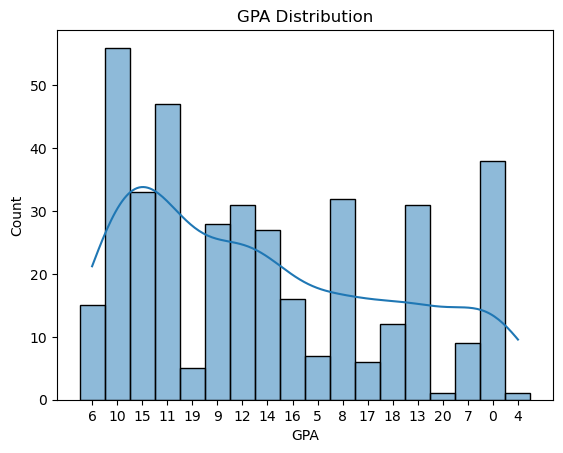

In [83]:
sns.histplot(df["GPA"], kde=True)
plt.title("GPA Distribution")
plt.show()


 # Correlation Heatmap
 
A **Correlation Heatmap** is a **visual representation** that shows how **strongly features (columns)** in your dataset are related to one another, especially to the **target variable** — in this project, the **`G3` column (final GPA)**.

###  **Why is it Important for GPA Prediction?**

1.  **Feature Selection**  
   - It helps you identify which variables are **strongly correlated** with GPA (`G3`).  
   - For example, if **`G1`** and **`G2`** show high correlation with `G3`, they should be included as **important predictors**.

2.  **Avoiding Multicollinearity**  
   - If two input features are **too similar**, they might mislead the model.  
   - A heatmap helps you **detect and remove redundant features**.

3. **Understanding Your Data**  
   - Helps build an overall understanding of how different variables are **related** to each other.

4.  **Better Model Performance**  
   - Using only **useful features** improves model **accuracy**, reduces **noise**, and increases **interpretability**.


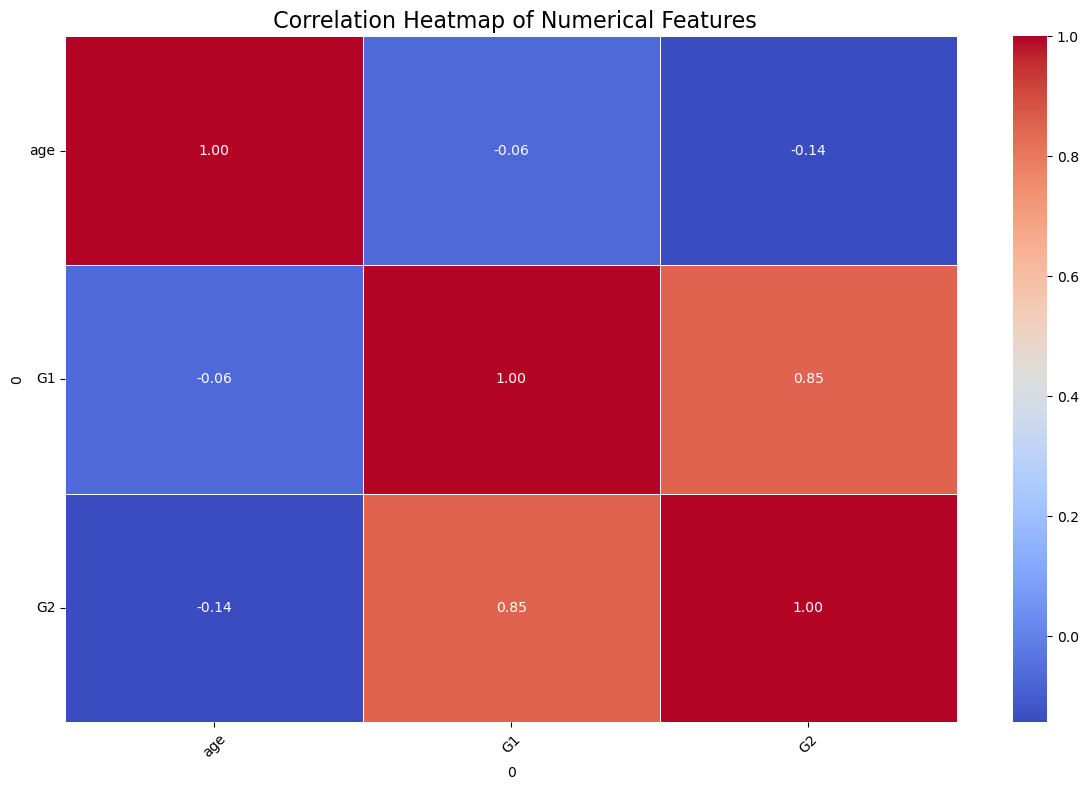

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot size
plt.figure(figsize=(12, 8))

# Generate correlation matrix for only numeric features
correlation_matrix = df.corr(numeric_only=True)

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Title and display
plt.title(" Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Re-loading & Splitting Dataset After Heatmap

After viewing the **Correlation Heatmap**, you may realize:
- The **original dataset** was not loading properly (many `NaN`s due to wrong separator).
- Some data was **clumped in a single column**, instead of 33 proper ones.

To fix this, we reload and manually **split the single column** into proper columns.


In [91]:

df_raw = pd.read_csv("C:/Users/HS TRADER/Documents/student-mat.csv", header=None)


df = df_raw[0].str.split(';', expand=True)


df.columns = [
    'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
    'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
    'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
    'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
    'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]


In [90]:
print(df.shape)
print(df.columns)
df.head()


(396, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
1,GP,"""F""",18,"""U""","""GT3""","""A""",4,4,"""at_home""","""teacher""",...,4,3,4,1,1,3,6,"""5""","""6""",6
2,GP,"""F""",17,"""U""","""GT3""","""T""",1,1,"""at_home""","""other""",...,5,3,3,1,1,3,4,"""5""","""5""",6
3,GP,"""F""",15,"""U""","""LE3""","""T""",1,1,"""at_home""","""other""",...,4,3,2,2,3,3,10,"""7""","""8""",10
4,GP,"""F""",15,"""U""","""GT3""","""T""",4,2,"""health""","""services""",...,3,2,2,1,1,5,2,"""15""","""14""",15


In [139]:
import pandas as pd
import csv


df = pd.read_csv("C:/Users/HS TRADER/Documents/student-mat.csv", 
                 sep=';', 
                 encoding='utf-8', 
                 quoting=csv.QUOTE_NONE,
                 on_bad_lines='skip',     
                 engine='python')

df = df.map(lambda x: x.replace('"', '').strip() if isinstance(x, str) else x)


df['G1'] = pd.to_numeric(df['G1'], errors='coerce')
df['G2'] = pd.to_numeric(df['G2'], errors='coerce')
df['G3'] = pd.to_numeric(df['G3'], errors='coerce')


print(df[['G1', 'G2', 'G3']].head())
print(df[['G1', 'G2']].isnull().sum())


   G1  G2  G3
0   5   6   6
1   5   5   6
2   7   8  10
3  15  14  15
4   6  10  10
G1    0
G2    0
dtype: int64


In [115]:
# Show how many missing values in each column
print(df.isnull().sum())


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [140]:

print(df.describe())


              age        Medu        Fedu  traveltime   studytime    failures  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean    16.696203    2.749367    2.521519    1.448101    2.035443    0.334177   
std      1.276043    1.094735    1.088201    0.697505    0.839240    0.743651   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     3.944304    3.235443    3.108861    1.481013    2.291139    3.554430   
std      0.896659    0.9988

# Visualizing Correlation Matrix

This heatmap provides an overview of **how numeric features in the dataset are correlated** with each other.


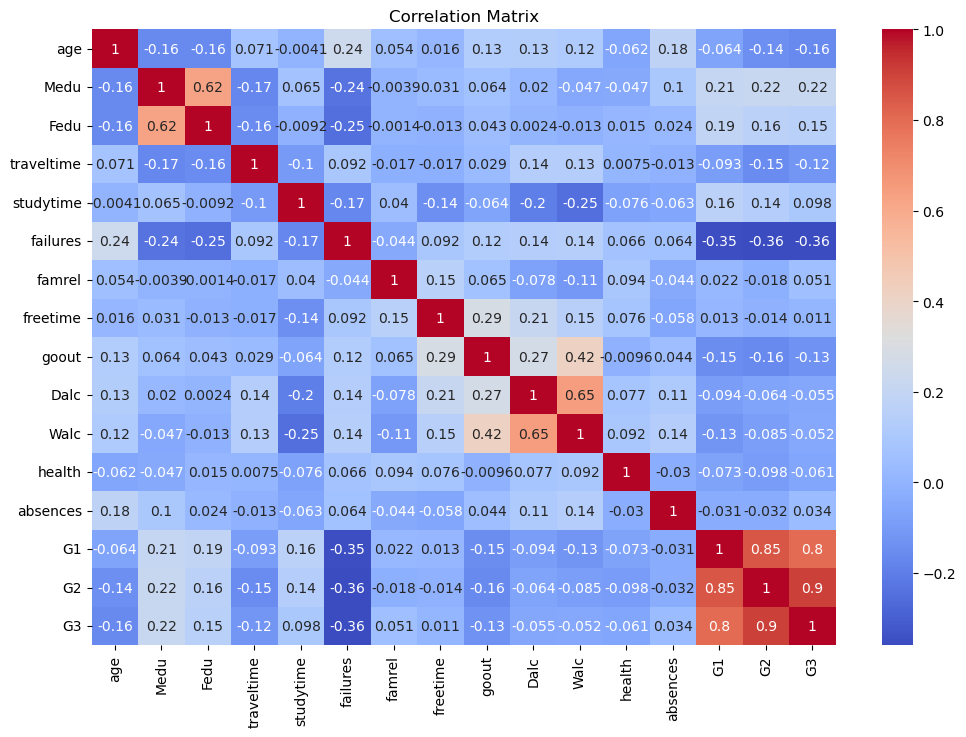

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# Distribution of Final Grade (G3)

This plot helps visualize the distribution of **students' final grades** in the dataset.

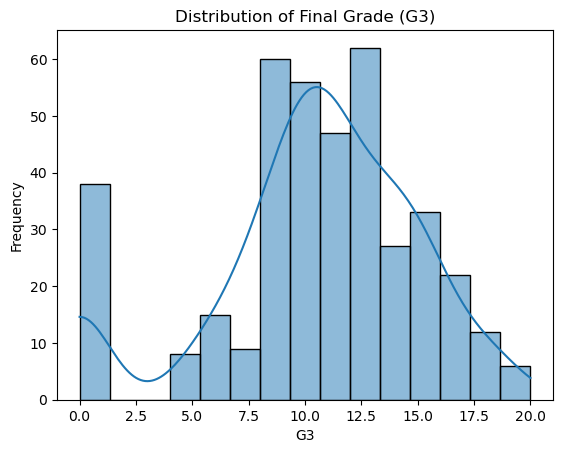

In [118]:
sns.histplot(df['G3'], bins=15, kde=True)
plt.title('Distribution of Final Grade (G3)')
plt.xlabel('G3')
plt.ylabel('Frequency')
plt.show()


In [119]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [120]:
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']


# Train/Test Split
- **`train_test_split()`**: Function from `sklearn` to randomly split the dataset.
- **`X`**: Independent features (input variables).
- **`y`**: Target variable (e.g., **`G3`** – final grade).
- **`test_size=0.2`**: 20% of the data is used for testing, and 80% for training.
- **`random_state=42`**: Ensures reproducibility by giving the same data split every time the code is run.

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Handle Missing Values

In [122]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


# Linear Regression Model Training and Prediction

We are using the **Linear Regression** algorithm from **Scikit-learn** to train a predictive model.
- **`LinearRegression()`**: Initializes a linear regression model.
- **`lr.fit(X_train, y_train)`**: Trains the model using the **training data** (features `X_train` and target `y_train`).
- **`y_pred_lr = lr.predict(X_test)`**: Uses the **trained model** to predict the target values for the **test set**.


In [123]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


# Step 6: Evaluate the Model
We'll use **MAE**, **MSE**, and **RMSE** as evaluation metrics.

We will evaluate the model performance using the following **regression metrics**:

- **MAE (Mean Absolute Error)**  
  - Measures the **average absolute difference** between actual and predicted values.  
  - Lower values indicate **better performance**.  
  
- **MSE (Mean Squared Error)**  
  - Measures the **average of squared errors** between actual and predicted values.  
  - Penalizes **larger errors** more than MAE.  

- **RMSE (Root Mean Squared Error)**  
  - The **square root of MSE**, brings error to the same unit as the target variable.  
  - Easier to interpret compared to MSE.  
  


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


print("Linear Regression Evaluation:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)


Linear Regression Evaluation:
MAE: 1.6466656197147511
MSE: 5.656642833231222
RMSE: 2.3783697847961367


# Support Vector Regressor (SVR)

In [144]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


try:
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)

    y_pred_svr = svr.predict(X_test)

    mae_svr = mean_absolute_error(y_test, y_pred_svr)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    rmse_svr = np.sqrt(mse_svr)

    print(" SVR Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_svr, 2))
    print(" MSE (Mean Squared Error):", round(mse_svr, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_svr, 2))

except NameError as e:
    print(" Error: Make sure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during SVR evaluation:")
    print(e)


 SVR Evaluation:
 MAE (Mean Absolute Error): 1.21
 MSE (Mean Squared Error): 4.26
 RMSE (Root Mean Squared Error): 2.06


# Stochastic Gradient Descent (SGDRegressor)


In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SGD Regressor on scaled data
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

# Evaluation
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print("SGD Regressor Evaluation:")
print("MAE:", mae_sgd)
print("MSE:", mse_sgd)
print("RMSE:", rmse_sgd)


SGD Regressor Evaluation:
MAE: 1.6654396144394905
MSE: 5.7135945522342695
RMSE: 2.3903126473819842


# Multi-Layer Perceptron (MLPRegressor)

In [127]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train and evaluate MLP Regressor
try:
    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)

    y_pred_mlp = mlp.predict(X_test)

    mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
    mse_mlp = mean_squared_error(y_test, y_pred_mlp)
    rmse_mlp = np.sqrt(mse_mlp)

    print(" MLP Regressor Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_mlp, 2))
    print(" MSE (Mean Squared Error):", round(mse_mlp, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_mlp, 2))

except NameError as e:
    print(" Error: Ensure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during MLP evaluation:")
    print(e)


 MLP Regressor Evaluation:
 MAE (Mean Absolute Error): 1.53
 MSE (Mean Squared Error): 5.48
 RMSE (Root Mean Squared Error): 2.34


D:\Users\HS TRADER\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


 # Decision Tree Regressor

In [141]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train and evaluate Decision Tree Regressor
try:
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_train, y_train)

    y_pred_tree = tree.predict(X_test)

    mae_tree = mean_absolute_error(y_test, y_pred_tree)
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    rmse_tree = np.sqrt(mse_tree)

    print(" Decision Tree Regressor Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_tree, 2))
    print(" MSE (Mean Squared Error):", round(mse_tree, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_tree, 2))

except NameError as e:
    print(" Error: Make sure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during Decision Tree evaluation:")
    print(e)


 Decision Tree Regressor Evaluation:
 MAE (Mean Absolute Error): 1.14
 MSE (Mean Squared Error): 4.2
 RMSE (Root Mean Squared Error): 2.05


# Compare Model Evaluation Metrics

This code block compiles and displays the **performance metrics** for all trained regression models.
  Creates a dictionary to store the **model names** and their corresponding evaluation metrics:
  - **`MAE`**: Mean Absolute Error
  - **`MSE`**: Mean Squared Error
  - **`RMSE`**: Root Mean Squared Error

- **`results_df = pd.DataFrame(results)`**:  
  Converts the dictionary into a **DataFrame** for better formatting and visualization.

- **`results_df[['MAE', 'MSE', 'RMSE']] = results_df[['MAE', 'MSE', 'RMSE']].round(2)`**:  
  Rounds all metric values to **2 decimal places** for cleaner output.

- **`print(results_df)`**:  
  Displays the final comparison table for all models.
### Purpose:
This step helps to **compare and evaluate** how each regression model performed, allowing us to identify the **most accurate** and **efficient** one based on the error metrics.


In [128]:
results = {
    'Model': ['Linear Regression', 'SVR', 'SGD Regressor', 'MLP Regressor', 'Decision Tree'],
    'MAE': [mae_lr, mae_svr, mae_sgd, mae_mlp, mae_tree],
    'MSE': [mse_lr, mse_svr, mse_sgd, mse_mlp, mse_tree],
    'RMSE': [rmse_lr, rmse_svr, rmse_sgd, rmse_mlp, rmse_tree]
}
results_df = pd.DataFrame(results)
results_df[['MAE', 'MSE', 'RMSE']] = results_df[['MAE', 'MSE', 'RMSE']].round(2)
print(results_df)


               Model   MAE   MSE  RMSE
0  Linear Regression  1.65  5.66  2.38
1                SVR  1.21  4.26  2.06
2      SGD Regressor  1.67  5.71  2.39
3      MLP Regressor  1.53  5.48  2.34
4      Decision Tree  1.14  4.20  2.05


# Visualize Model Performance

This block generates **bar plots** for each evaluation metric to visually compare how well each model performed.

- **`import seaborn as sns`**, **`import matplotlib.pyplot as plt`**  
  These libraries are used for **creating visualizations**:
  - `seaborn`: For stylish statistical plots.
  - `matplotlib`: For general plotting.

- **`metrics = ['MAE', 'MSE', 'RMSE']`**  
  List of **evaluation metrics** to visualize (Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error).

- **`for metric in metrics:`**  
  Loops through each metric to create a separate plot.

- **`plt.figure(figsize=(8,5))`**  
  Sets the size of each figure (width = 8, height = 5).

- **`sns.barplot(x='Model', y=metric, data=results_df)`**  
  Creates a **bar chart** using Seaborn:
  - `x`: Model names.
  - `y`: Evaluation metric values.
  - `data`: The DataFrame that contains all the results.

- **`plt.title(f'Model Comparison - {metric}')`**  
  Sets the **title of each plot** dynamically according to the current metric.

- **`plt.xticks(rotation=45)`**  
  Rotates x-axis labels by 45 degrees for better readability.

- **`plt.show()`**  
  Displays the plot.

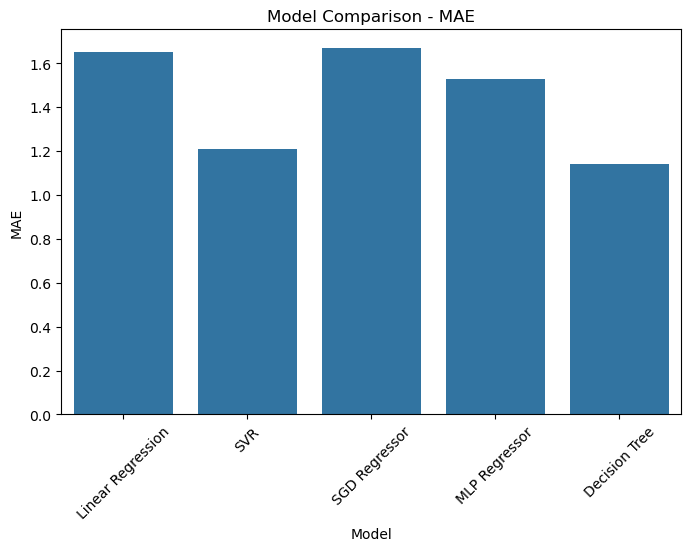

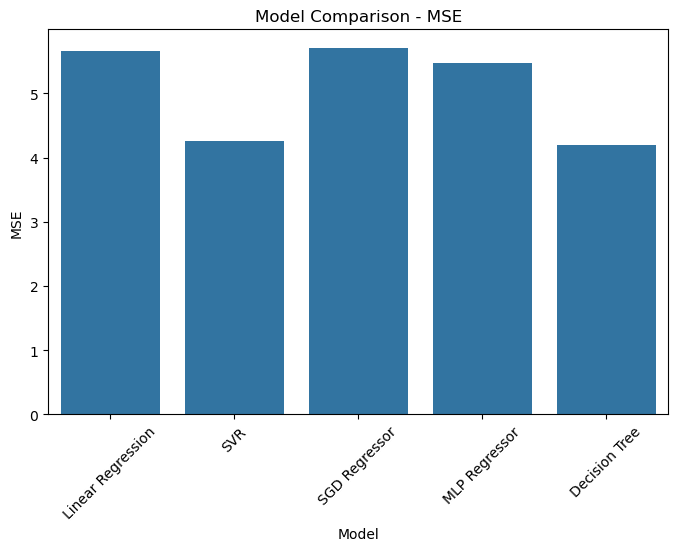

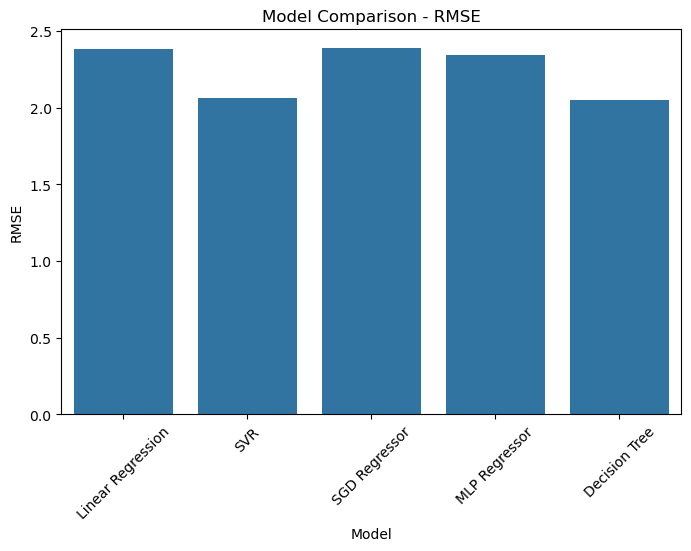

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['MAE', 'MSE', 'RMSE']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'Model Comparison - {metric}')
    plt.xticks(rotation=45)
    plt.show()

# Create Comparison Table of Actual vs Predicted GPA (G3)

This step creates a **DataFrame** to compare the **actual GPA values** (G3) from the test set with the **predicted GPA values** generated by the **Decision Tree model**.


In [143]:

comparison_df = pd.DataFrame({
    'Actual GPA (G3)': y_test,
    'Predicted GPA (G3)': y_pred_tree
})


print(comparison_df.head(20))


     Actual GPA (G3)  Predicted GPA (G3)
78                10                 8.0
371               12                12.0
248                5                 8.0
55                10                10.0
390                9                 9.0
223               13                13.0
42                18                20.0
234                6                 5.0
316                0                 9.0
116               14                14.0
9                 15                14.0
209                7                 6.0
323               15                15.0
393               10                13.0
258               14                15.0
155                8                10.0
124                8                 0.0
272               11                11.0
324               15                17.0
334                0                 0.0


# Plotting Actual vs Predicted GPA (Decision Tree)

This line plot helps visualize how well the **Decision Tree Regressor** model performed by comparing the actual and predicted GPA (G3) values.

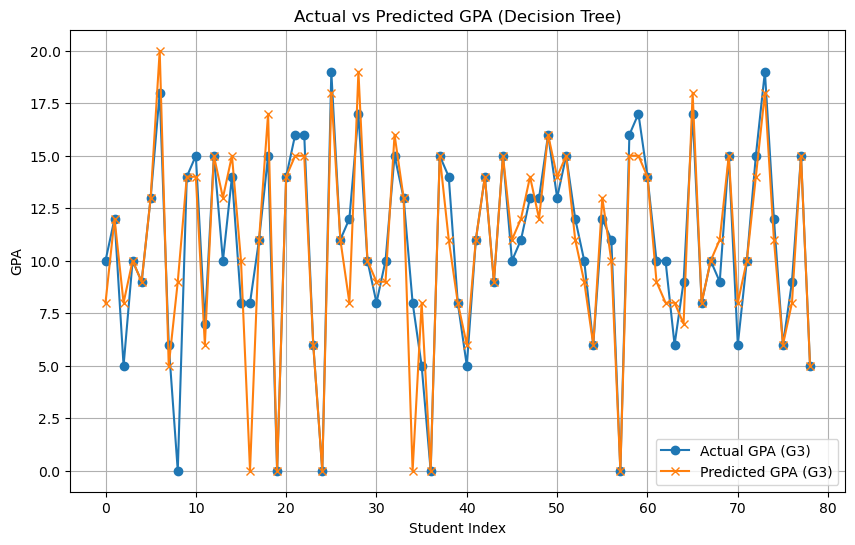

In [131]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual GPA (G3)', marker='o')
plt.plot(y_pred_tree, label='Predicted GPA (G3)', marker='x')
plt.title('Actual vs Predicted GPA (Decision Tree)')
plt.xlabel('Student Index')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()
